## Single Layer Perceptron from scratch
IE7860_Winter2021_Assignment-1

Priyanka Patil

Question-1








### Introduction

The single layer Perceptron is the simple neural network. It’s typically used for binary classification problems (1/0, Yes/No) where the Decision Boundary is linear.

Let us begin by importing some libraires required for creating our neural network.

In [1]:
    import numpy as np
    import pandas as pd
    import seaborn as sns
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split

Importing the Two class Gaussian data

In [2]:
data = pd.read_csv('Gaussian.csv')
data.head()

,X,Y,Label
0,-0.2418,-0.8484,0
1,-1.6919,1.0404,0
2,-0.3198,0.6226,0
3,-2.0725,-0.7876,0
4,-0.1002,0.4883,0


Plotting the data to check if it is linearly separable. We see that a decision boundary can be drawn to linearly separate the data However, there are some overlaps of the data points.

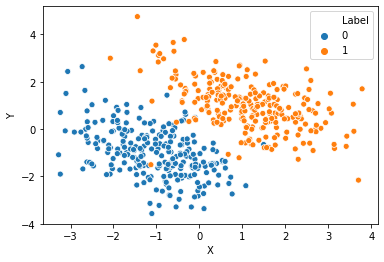

In [3]:
sns.scatterplot(x='X',y='Y',hue='Label', data=data)

Splitting the data in to train and test i.e., I will train my model with 60% data and test it with remaining 40% data

In [4]:
X = data[data.columns[0:2]]
Y = data[data.columns[2]]

In [5]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size= 0.4, random_state=0)
a=np.dot([1,2],[3,4])
a
X_train= X_train.to_numpy()
Y_train= Y_train.to_numpy()
X_test= X_test.to_numpy()
Y_test= Y_test.to_numpy()

As an initial step, I am training my Perceptron to take a look at its weights and bias. Here I am Initializing the weights, calculating the dot product of weights by the inputs, and comparing it against the threshold value.

In [6]:
class MyPerceptron:
    
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        self.lr=learning_rate
        self.epochs= n_iterations
        self.weights= None
        self.bias= None
       
        
    def fit(self, X, Y):
        
        self.weights= np.zeros(X.shape[1])
        self.bias=0
        
        for epoch in range(self.epochs):

            for i in range(X.shape[0]):

                Y_pred= self.activation_function(np.dot(self.weights, X[i])+ self.bias)

                self.weights= self.weights+self.lr *(Y[i]- Y_pred)*X[i]
                self.bias= self.bias+ self.lr *(Y[i]- Y_pred)
                
        
        print("Training Complete")
        print('')
        print("The weights are: ")
        print(self.weights)
        print('')
        print("The bias is: ")
        print(self.bias)
        
    def activation_function(self, activation):
        if activation >=0:
            return 1
        else:
            return 0
        
    def predict(self,X):

        Y_pred=[]

        for i in range(X.shape[0]):
            
            Y_pred.append(self.activation_function(np.dot(self.weights, X[i])+self.bias))
        
        return np.array(Y_pred)    

Now, let's test our Perceptron and see how accurately it is classifying the data

In [7]:
clf= MyPerceptron()
clf.fit(X_train, Y_train)
Y_pred= clf.predict(X_test)

print('')
print('Testing Complete')
print('')
print('The accuracy score is:')
print(accuracy_score(Y_test, Y_pred))

Training Complete

The weights are: 
[0.5923  0.37924]

The bias is: 
-0.10000000000000003

Testing Complete

The accuracy score is:
0.97


The Perceptron is able to classify the data with 97% accuracy.

Let's now compare the accuracy with the Scikit Learn Perceptron to see if our model is classifying the data points correctly.

In [8]:
#from sklearn.linear_model import Perceptron

# training the sklearn Perceptron
#clf = Perceptron(random_state=None, eta0=0.1, shuffle=False, fit_intercept=False)
#clf.fit(X_train, Y_train)
#y_predict = clf.predict(X_test)
#print(accuracy_score(Y_test, y_predict))

On running the above code, We see that Sckitlearn Perceptron is giving an accuracy of 96% that means our Perceptron is classifying the data points in a right way.

### Conclusion & Observations

On testing our Perceptron, it can linearly separate (Decision boundary) the two classes with the accuracy of 97%.

I have tried training the model with (70%-80%) data and then testing it with the remaining (30%-20%) data. But found that the model's performance did not show much improvement.

Further, I have tried analyzing the results by varying the learning rate and number of epochs However, there were very slight variations observed in the model's performance.
